In [16]:
#import fits from io module of astropy
from astropy.io import fits

In [17]:
# create HDUlist() to store different HDUs
hdulist = fits.HDUList()

#create your own primary HDU
hdu = fits.PrimaryHDU()

# getting the pixel data of M31 from SkyView and adding it to the primary HDU
SkyView = 'https://skyview.gsfc.nasa.gov/current/cgi/query.pl'
from astroquery.skyview import SkyView
SkyView.get_images(position='M31', survey=['SDSSg'])
hdu = SkyView.get_images(position='M31', survey=['SDSSg'])[0][0]

M31_Pixels = hdu.data
M31_header = hdu.header

#add the pixel data to the primary HDU
hdu.data = M31_Pixels

#add metadata to the primary HDU
hdu.header = M31_header

#append the primary HDU to the HDUlist
hdulist.append(hdu)

#Generate a new FITS file using hdulist
hdulist.writeto('M31_SDSSg_FIT.fits')


In [18]:
#open the FITS file and print the info
my_fits = fits.open('M31_SDSSg_fits_file.fits')
my_fits


In [19]:
my_fits[0].header


SIMPLE  =                    T / Written by SkyView Thu Feb 08 23:57:06 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [20]:
my_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [21]:
dummy_data = my_fits[0].data

In [22]:
dummy_data.shape

(300, 300)

In [23]:
type(dummy_data)

numpy.ndarray

# Pixel Scaling on M31 data/ our own created dummy fits file

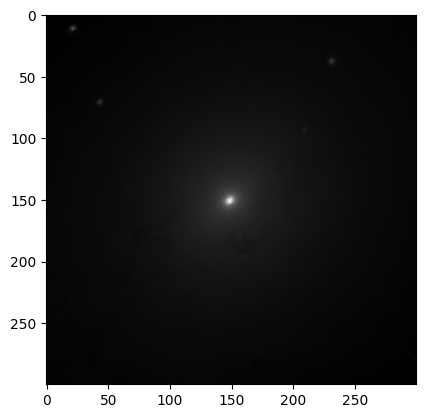

In [24]:
import matplotlib.pyplot as plt
plt.imshow(dummy_data, cmap='gray')

In [25]:
# to get a much more detailed output
import numpy as np

In [26]:
print('summary statistics of the pixel values')
print('Min:', np.min(dummy_data))
print('Max:', np.max(dummy_data)) #related to the center where telescope was focused o, can be seen in X and Y reference pixels in my_fits[0].header cell
print('Mean:', np.mean(dummy_data)) # mostly the pixels skewed towards minimum value
print('Standard Deviation:', np.std(dummy_data))

summary statistics of the pixel values
Min: 5.359375
Max: 178.0
Mean: 13.329445
Standard Deviation: 6.392227


In [27]:
# printing the value of pixel at the center of the andromeda galaxy
dummy_data[150, 150] #pixel value or coordinates at the center of the image and it is far away from the maximum pixel value which means there is some sort of noise in the image

148.5

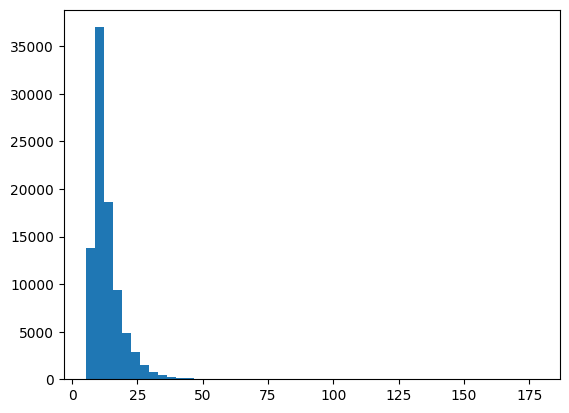

In [28]:
#get the histogram distribution of the pixel values
plt.hist(dummy_data.flat, bins = 50) #convert 2D into 1D
plt.show() #pixels are left skewed so a lot of noise

# Intensity scaling is a technique used to enhance the contrast of an image. It is done by stretching the range of pixel values to span the full range of values allowed for the data type. This is done by subtracting the minimum pixel value from all pixels and then dividing by the maximum pixel value. This is also known as min-max scaling. 
# intensity normalization or linear scaling 
# The pixel values are scaled to span the full range of values allowed for the data type.

# x scaled = (x - min) / (max - min) * 255 

In [29]:
# define a function to normalize the pixel values
def normalize_data(data):
    data_min = np.min(data)
    data_max = np.max(data)
    return (data - data_min) / (data_max - data_min)

In [30]:
# a common function that will be used to visualize the scaled pixel values of the image
def plot_image(data, title, color):
    plt.imshow(data, cmap='grey', origin='lower')
    plt.title(title, color=color, weight = 'bold')
    plt.axis('off')
    plt.show()

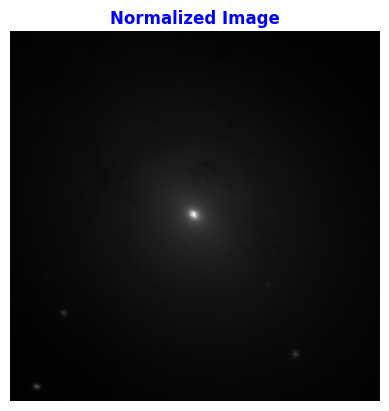

In [31]:
minmax_array = normalize_data(dummy_data) #normalized pixel values of dummy data and visualize it
plot_image(minmax_array, 'Normalized Image', 'blue')  # plot the normalized image

In [32]:
# function to compare the original and normalized pixel values
def compare_images(original, normalized, title1, title2, origin = 'lower'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(original, cmap='gray')
    ax1.set_title(title1, color='red', weight='bold')
    ax1.axis('off')
    ax2.imshow(normalized, cmap='gray')
    ax2.set_title(title2, color='blue', weight='bold')
    ax2.axis('off')
    plt.show()

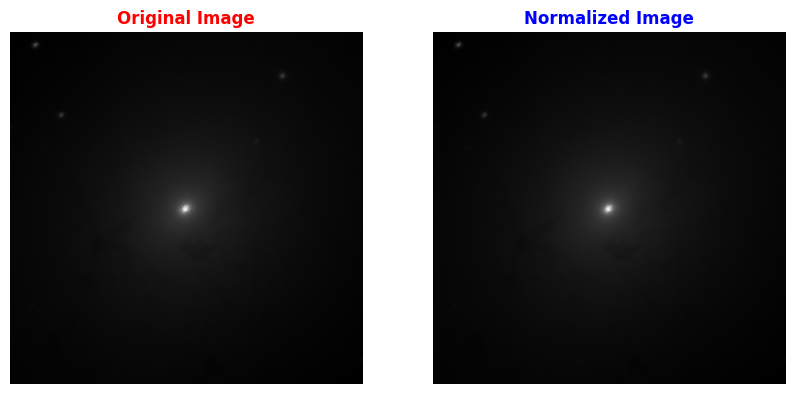

In [33]:
compare_images(dummy_data, minmax_array, 'Original Image', 'Normalized Image') #compare the original and normalized pixel values

# another scaling method used for images
# 1) standard scaling 
# 2) log normalization
# 3) square root scaling

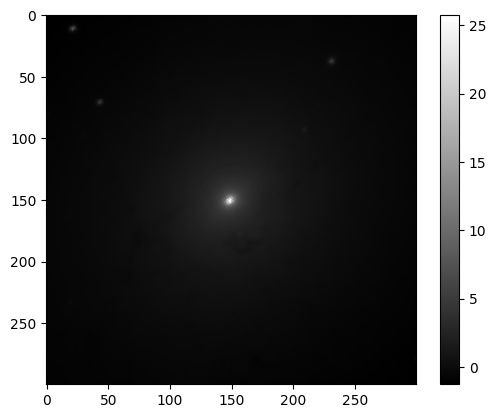

In [34]:
# standardization / standard scaling or z-score normalization or z scaling
def standardize_data(data):
    data_mean = np.mean(data)
    data_std = np.std(data)
    return (data - data_mean) / data_std

#visualize the standardized pixel values
standardized_array = standardize_data(dummy_data)
plt.imshow(standardized_array, cmap='gray')
plt.colorbar()
plt.show()

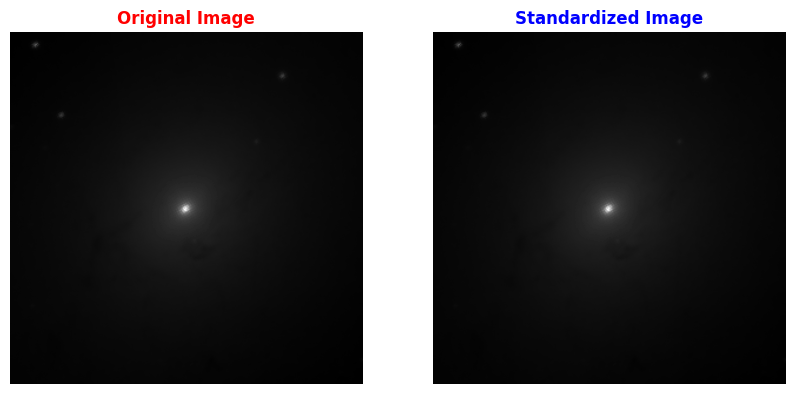

In [35]:
#compare the original and standardized pixel values
compare_images(dummy_data, standardized_array, 'Original Image', 'Standardized Image', origin='lower')

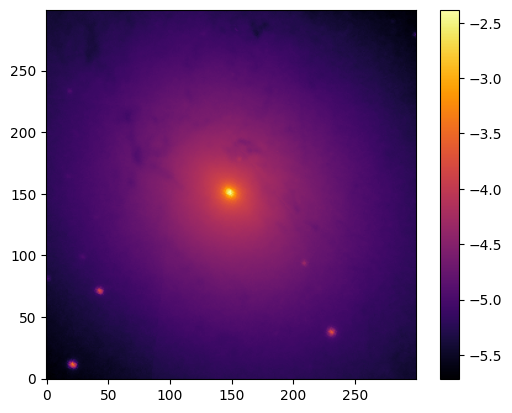

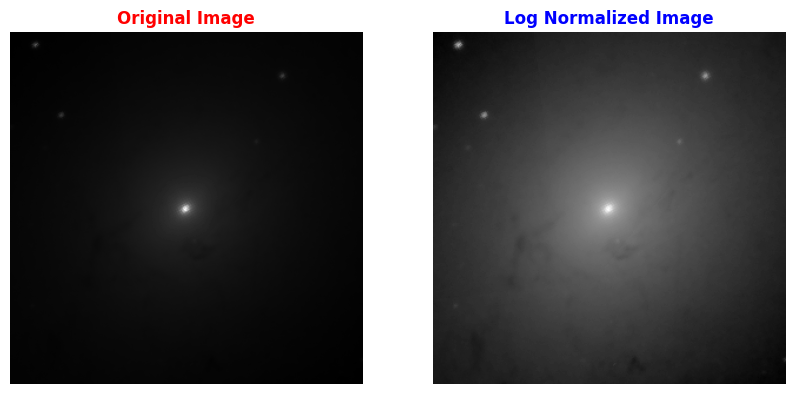

In [36]:
#log normalization is used to reduce the dynamic range of the pixel values. so we take the log of the pixel values and then scale them back by taking exponent of the log values to get the original pixel values back
def log_normalize_data(data):
    return np.log1p(data) - np.mean(np.log1p(data)) / np.std(np.log1p(data))

#visualize the log normalized pixel values
log_normalized_array = log_normalize_data(dummy_data)
plt.imshow(log_normalized_array, cmap='inferno', origin='lower')
plt.colorbar()
plt.show()

#compare the original and log normalized pixel values
compare_images(dummy_data, log_normalized_array, 'Original Image', 'Log Normalized Image', origin='lower')

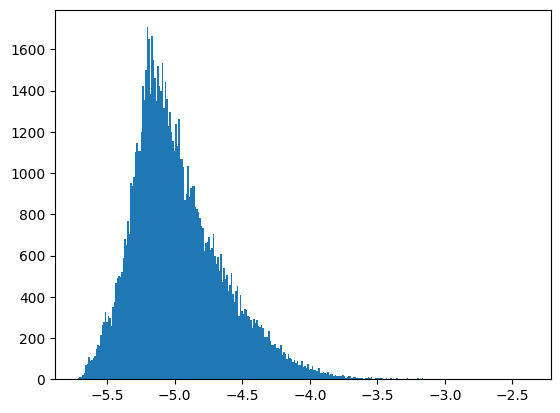

In [37]:
#create a histrogram distribution of the log normalized pixel values, best output so far
plt.hist(log_normalized_array.flat, bins = 300)
plt.show()

In [38]:
# get the shape
log_normalized_array.shape

(300, 300)

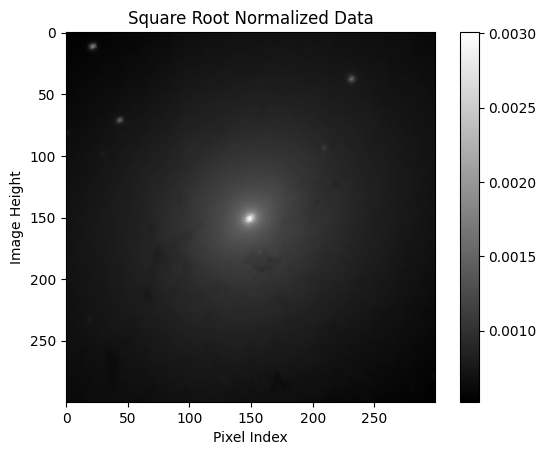

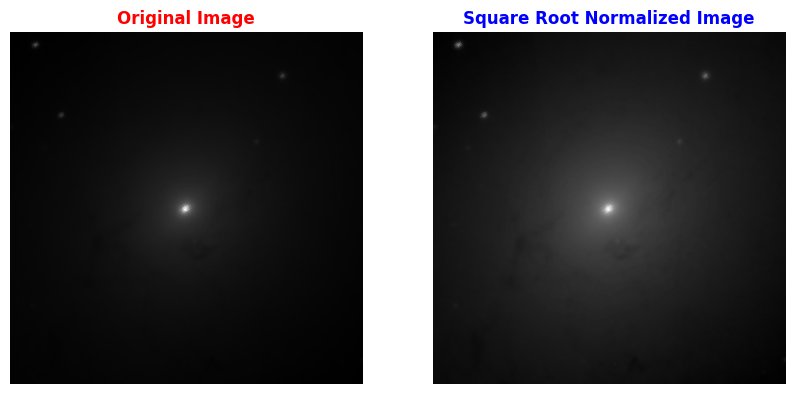

In [39]:
# square root normalization
def sqrt_normalize_data(data):
    return np.sqrt(data) / np.sqrt(np.sum(np.square(data)))

sqrt_normalize_data = sqrt_normalize_data(dummy_data)
plt.imshow(sqrt_normalize_data, cmap='gray')
plt.colorbar()
plt.title('Square Root Normalized Data')
plt.xlabel('Pixel Index')
plt.ylabel('Image Height')
plt.show()

#compare the original and square root normalized pixel values
compare_images(dummy_data, sqrt_normalize_data, 'Original Image', 'Square Root Normalized Image', origin='lower')

# astropy.visualization modules are used to scale the pixel values of the image.
# ZscaleInterval

zscaleinterval is a function that is used to scale the pixel values of the image to a standard range of pixel values. 

In [40]:
# get the zscaleinterval from visualization module of astropy
# [1 , 2, 3, 4, 5, 6, 7, 8, 9] ==> 3, 8
# any value lower than 3 will change to 3 and any value greater than 8 will change to 8
# [3, 3, 3, 4, 5, 6, 7, 8, 8]
# following this process for astronomical data 
from astropy.visualization import ZScaleInterval


In [41]:
# create the object for zscaleinterval
zscale = ZScaleInterval()
# set the interval to [0, 1] (default)
z1, z2 = zscale.get_limits(log_normalized_array)
print('zmin:', z1)
print('zmax:', z2)

zmin: -5.7108912
zmax: -3.198506820637269


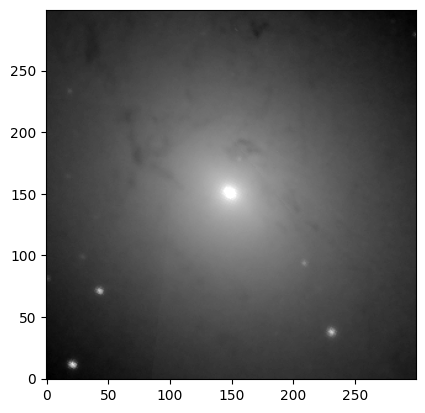

In [42]:
# plot the dummy data using zscale interval
plt.imshow(log_normalized_array, cmap='gray', origin='lower', vmin=z1, vmax=z2)

(300, 300, 4)

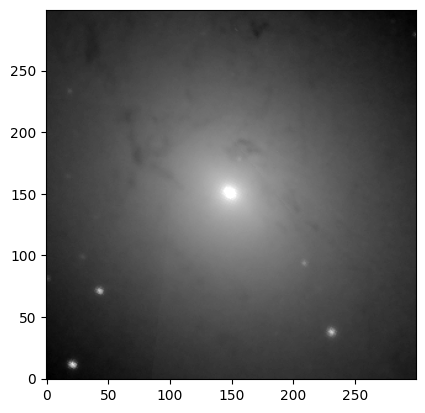

In [43]:
img = plt.imshow(log_normalized_array, cmap='gray', origin='lower', vmin=z1, vmax=z2)
image_array = img.make_image(renderer=None, unsampled=True)[0] # this is to get the image object and convert it to an array
image_array.shape

In [44]:
# Red, Green, Blue and Alpha (RGBA) channels of the image array are stored in the last dimension
#import cv2 library and remove 4 channels and convert to 1 channel (grayscale)

import cv2
gray_array = cv2.cvtColor(image_array, cv2.COLOR_RGBA2GRAY)

In [45]:
gray_array.shape

(300, 300)

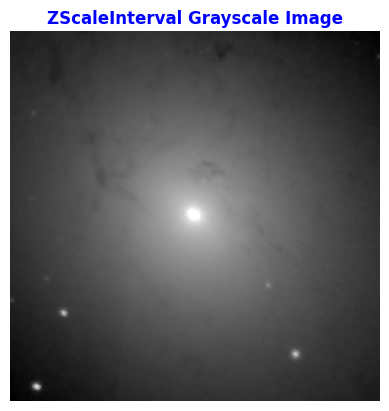

In [46]:
#visualize the grayscale image
plot_image (gray_array, 'ZScaleInterval Grayscale Image', 'blue')

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

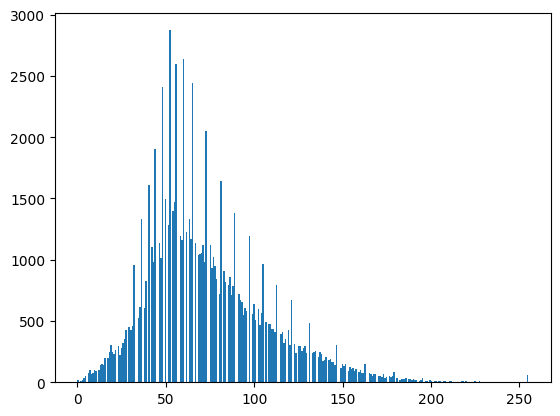

In [47]:
plt.hist(gray_array.flat, bins = 300)
plt.imshow

# Denoising using Gaussian
blurring the image by removing the noises 

In [48]:
# we will need convulation 2D filter from scipy's signal module
from scipy.signal import convolve2d
import numpy as np

#generate your kernel filter
np.ones((3, 3))/9

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [49]:
kernel =np.ones((3, 3))/9

kernel 

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [50]:
#create a gaussian kernel
gaussian_kernel = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])



In [51]:
# get the convulation done using our kernel
convolved_image = convolve2d(gray_array, kernel, mode='same') # mode means shape of the output array will have the same shape as the input array


In [52]:
gaussian_convolved_image = convolve2d(gray_array, gaussian_kernel, mode='same')

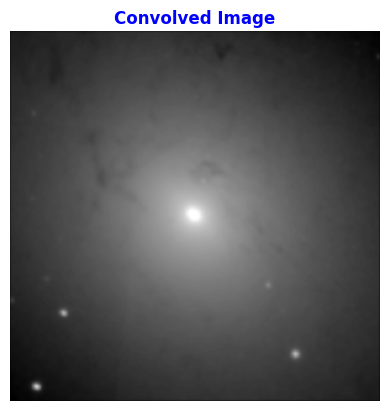

In [53]:
#visualize the first kernel filter convulation
plot_image(convolved_image, 'Convolved Image', 'blue')
plt.show()

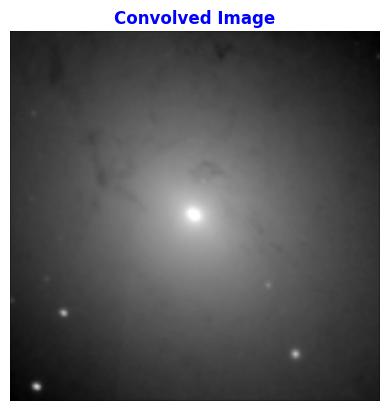

In [54]:
plot_image(gaussian_convolved_image, 'Convolved Image', 'blue')
plt.show()

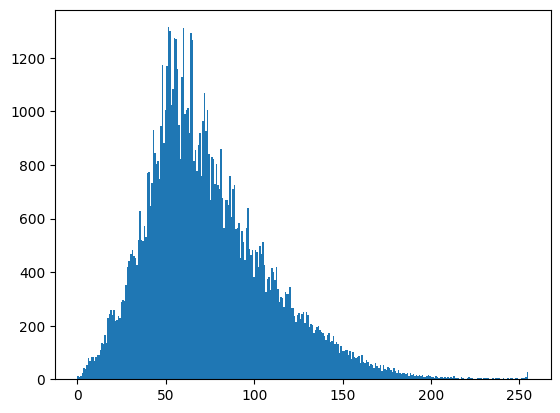

In [55]:
#get the histogram distribution of the convolved image
plt.hist(convolved_image.flat, bins = 300) #this hisogram has filled the gaps as compared to the previous histogram
plt.show()

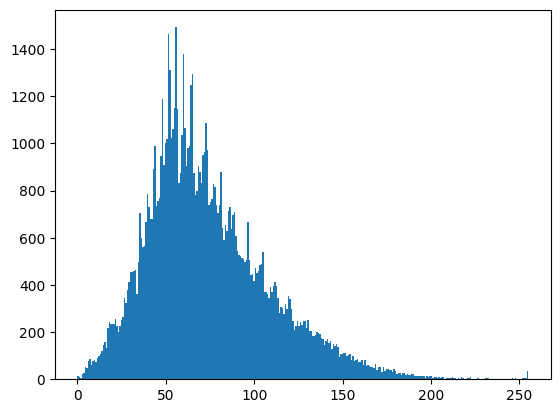

In [56]:
plt.hist(gaussian_convolved_image.flat, bins = 300) #this hisogram has filled the gaps as compared to the previous histogram
plt.show()

# enchaning the features/ feature extraction
# Meijering filter
# Sato filter

In [57]:
#import scikit-image library to apply sato filter
#%pip install scikit-image
import skimage as ski
print(ski.__version__)


0.22.0


In [70]:
# enhancing the linear features on M31
# create a spectral list to use later
SPECTRAL_LIST = ["gray", "hot", "jet", "prism", "nipy_spectral"]

# import meijering and sato filters from skimage

from skimage.filters import meijering, sato #meijering is used to enhance the linear features and sato is used to enhance the blob like features
#to apply or look for more filters, visit skimage documentation: http://scikit-image.org/docs/dev/api/skimage.filters

#implemeneting filters on colvuled images
meijering_output = meijering(convolved_image)

sato_output = sato(convolved_image)

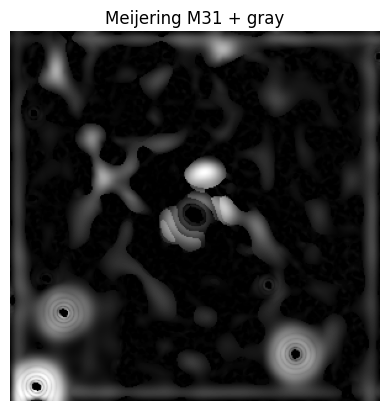

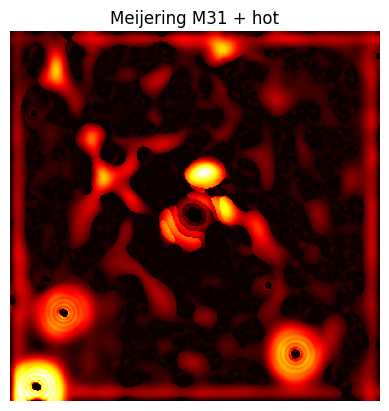

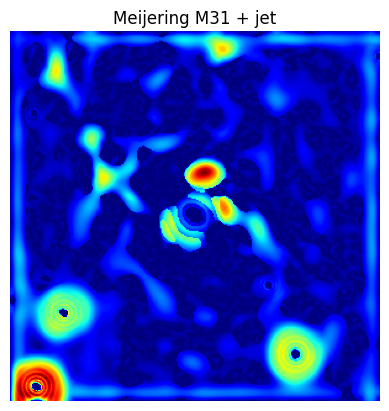

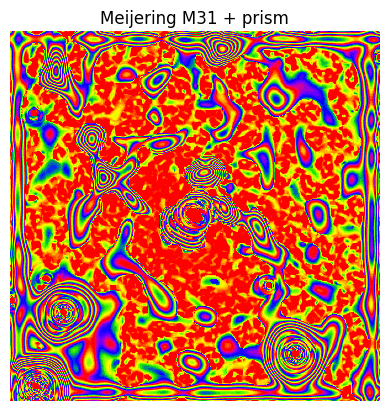

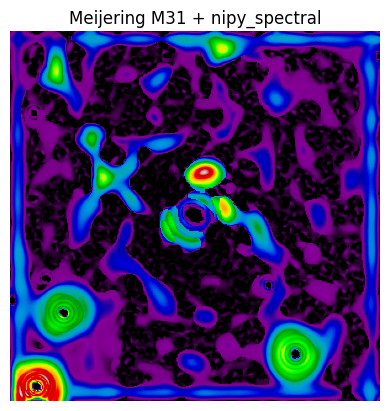

<Figure size 640x480 with 0 Axes>

In [72]:
# for each element in the spectral list, visualize the output of the meijering filter
for colormap in SPECTRAL_LIST:
    plt.imshow(meijering_output, cmap=colormap, origin='lower')
    plt.title(f'Meijering M31 + {colormap}')
    plt.axis('off')
    plt.show()
    
#save the plots
plt.savefig('Meijering_M31.png')

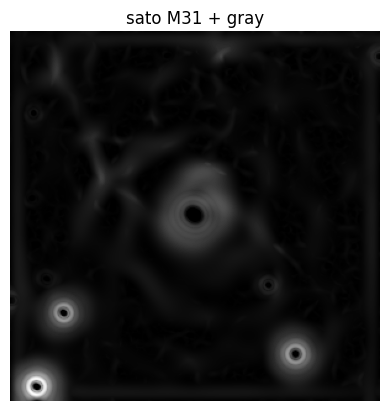

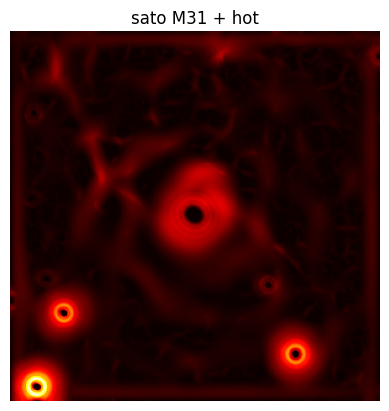

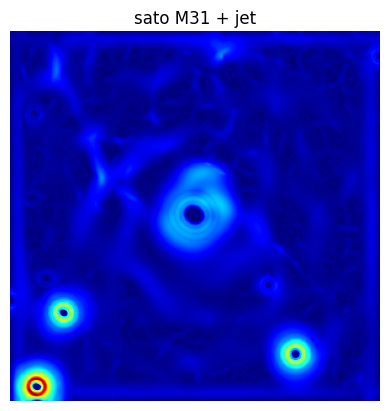

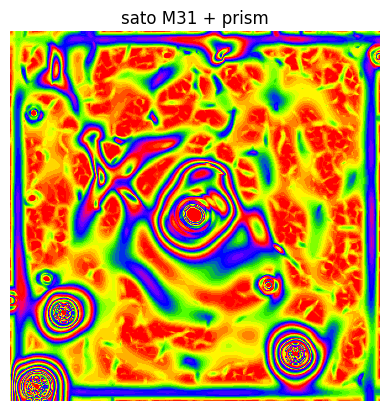

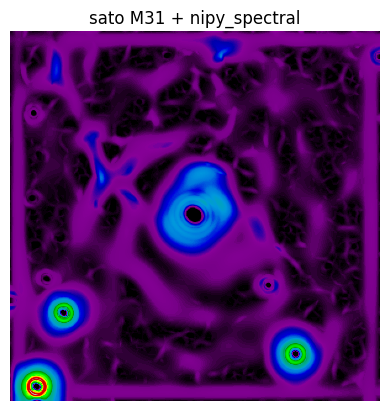

<Figure size 640x480 with 0 Axes>

In [73]:
for colormap in SPECTRAL_LIST:
    plt.imshow(sato_output, cmap=colormap, origin='lower')
    plt.title(f'sato M31 + {colormap}')
    plt.axis('off')
    plt.show()
    
#save the plots
plt.savefig('sato_M31.png')

# cornor foerstner : a fast operator for detecting precise location of distinct points, cornors, centers of circles and ellipses in an image. 

In [74]:
from skimage.feature import corner_foerstner

In [75]:
corner_foerstner(convolved_image)

(array([[5.31738935e-02, 1.81758334e-01, 8.92968244e-01, ...,
         3.46510434e+02, 8.45456975e+02, 7.33038505e+02],
        [1.69146581e-01, 4.49778442e-01, 1.01435030e+00, ...,
         5.64024980e+02, 1.13714456e+03, 8.46942391e+02],
        [2.64030432e-01, 6.92663871e-01, 1.15423275e+00, ...,
         4.45028704e+02, 5.61868120e+02, 3.44723192e+02],
        ...,
        [3.40754406e+02, 5.88979281e+02, 4.95184945e+02, ...,
         6.60529000e+00, 9.35603634e+00, 5.49863456e+00],
        [8.66373672e+02, 1.19594829e+03, 6.08650958e+02, ...,
         6.34573643e+00, 1.09480046e+01, 8.43666860e+00],
        [7.63115839e+02, 8.88996359e+02, 3.64236026e+02, ...,
         3.35277195e+00, 6.76052941e+00, 6.28582159e+00]]),
 array([[0.25692793, 0.15613462, 0.21599257, ..., 0.26119998, 0.641032  ,
         0.6877126 ],
        [0.26343801, 0.17373539, 0.14060204, ..., 0.56638264, 0.8875247 ,
         0.64628558],
        [0.15555139, 0.1402378 , 0.10967623, ..., 0.98269901, 0.56953138,

In [76]:
(len(corner_foerstner(convolved_image)))

2

In [77]:
feature_output = corner_foerstner(convolved_image)

In [78]:
feature_output[0] #error ellipse sizes 

array([[5.31738935e-02, 1.81758334e-01, 8.92968244e-01, ...,
        3.46510434e+02, 8.45456975e+02, 7.33038505e+02],
       [1.69146581e-01, 4.49778442e-01, 1.01435030e+00, ...,
        5.64024980e+02, 1.13714456e+03, 8.46942391e+02],
       [2.64030432e-01, 6.92663871e-01, 1.15423275e+00, ...,
        4.45028704e+02, 5.61868120e+02, 3.44723192e+02],
       ...,
       [3.40754406e+02, 5.88979281e+02, 4.95184945e+02, ...,
        6.60529000e+00, 9.35603634e+00, 5.49863456e+00],
       [8.66373672e+02, 1.19594829e+03, 6.08650958e+02, ...,
        6.34573643e+00, 1.09480046e+01, 8.43666860e+00],
       [7.63115839e+02, 8.88996359e+02, 3.64236026e+02, ...,
        3.35277195e+00, 6.76052941e+00, 6.28582159e+00]])

In [79]:
feature_output[1] #roundness of error ellipse

array([[0.25692793, 0.15613462, 0.21599257, ..., 0.26119998, 0.641032  ,
        0.6877126 ],
       [0.26343801, 0.17373539, 0.14060204, ..., 0.56638264, 0.8875247 ,
        0.64628558],
       [0.15555139, 0.1402378 , 0.10967623, ..., 0.98269901, 0.56953138,
        0.2639149 ],
       ...,
       [0.23765536, 0.5374281 , 0.96245655, ..., 0.59926956, 0.59451912,
        0.29751234],
       [0.62650466, 0.87912833, 0.56761559, ..., 0.41370751, 0.68963496,
        0.56074099],
       [0.69108085, 0.64797108, 0.26091718, ..., 0.19689049, 0.4678965 ,
        0.56874122]])

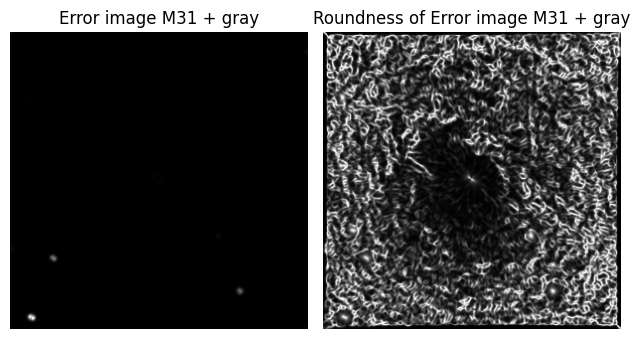

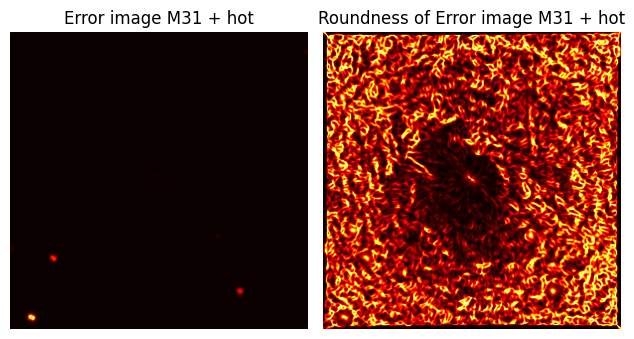

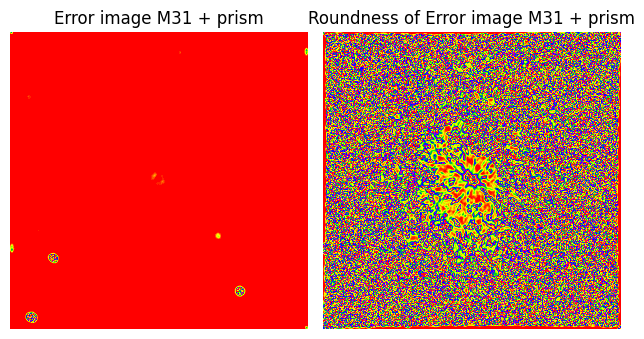

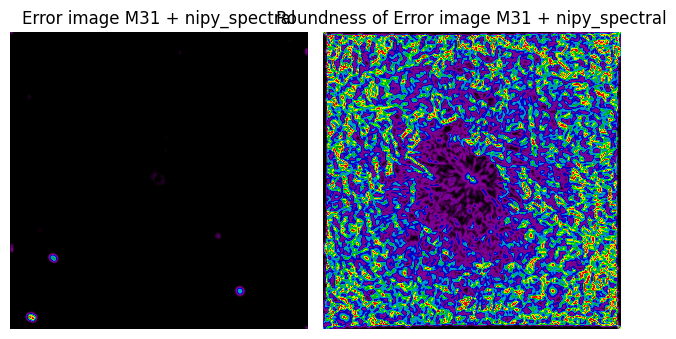

In [80]:
# subplot visualization of the feature output
for colormap in Spectral_list:
    plt.subplot(1, 2, 1)
    plt.imshow(feature_output[0], cmap=colormap, origin='lower')
    plt.title(f'Error image M31 + {colormap}')
    plt.axis('off')
    
    
    plt.subplot(1, 2, 2)
    plt.imshow(feature_output[1], cmap=colormap, origin='lower')
    plt.title(f'Roundness of Error image M31 + {colormap}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Multiscale basic features  extraction (local features)

In [81]:
from skimage.feature import multiscale_basic_features

featured_image = multiscale_basic_features(convolved_image)
featured_image.shape

(300, 300, 24)

In [85]:
#storing each and every channel from p1 to p24 in a list 
# each channel or feature from p1 to p24 has 300x300 pixels
cv2.split(featured_image)

(array([[2.3208260e-08, 1.9156901e-04, 7.3950127e-02, ..., 1.9881552e+01,
         1.9062490e+01, 1.3731119e+01],
        [1.0359851e-04, 4.1708858e-03, 1.2708016e-01, ..., 2.7078173e+01,
         2.6120098e+01, 1.8972494e+01],
        [3.8216390e-02, 8.8911921e-02, 4.4176045e-01, ..., 2.7671108e+01,
         2.6859919e+01, 1.9712666e+01],
        ...,
        [1.9966602e+01, 2.7701714e+01, 2.9087547e+01, ..., 3.3242710e+00,
         2.9723754e+00, 2.4255981e+00],
        [1.9145643e+01, 2.6499920e+01, 2.7600842e+01, ..., 2.7347806e+00,
         2.5414069e+00, 2.0875525e+00],
        [1.4142460e+01, 1.9462111e+01, 2.0040451e+01, ..., 1.8846914e+00,
         1.6480321e+00, 1.2666371e+00]], dtype=float32),
 array([[1.1173619e-03, 6.2606081e-02, 5.3964430e-01, ..., 5.0784850e+00,
         6.6387734e+00, 5.7406077e+00],
        [3.7434395e-02, 1.6540191e-01, 7.4847513e-01, ..., 5.4919963e+00,
         7.4617276e+00, 6.5657544e+00],
        [2.7906081e-01, 4.9320903e-01, 1.0749985e+00, ...,

In [92]:
#create a list of pixels P1 to P24 and save it in variable Pixels
P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24 = cv2.split(featured_image)
Pixels = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24]


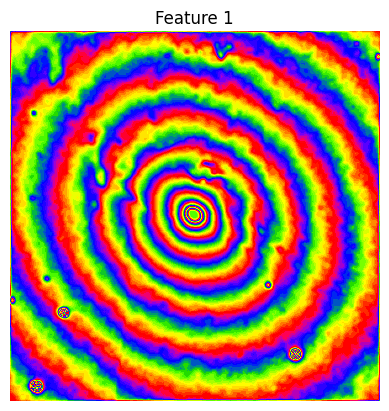

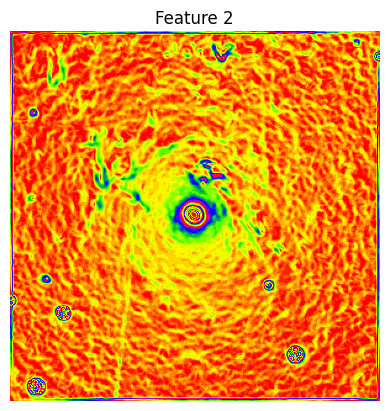

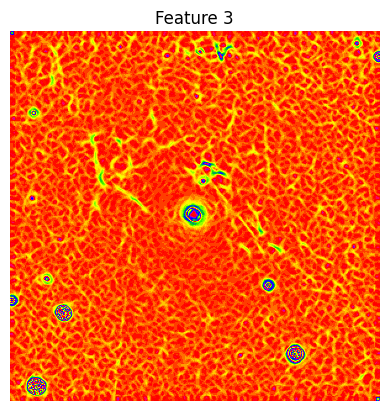

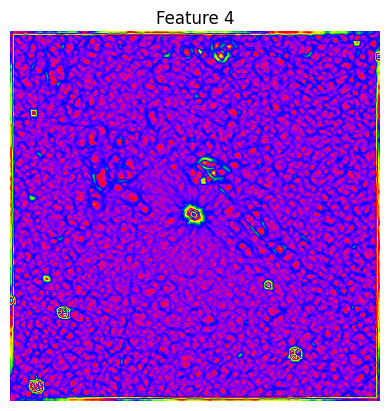

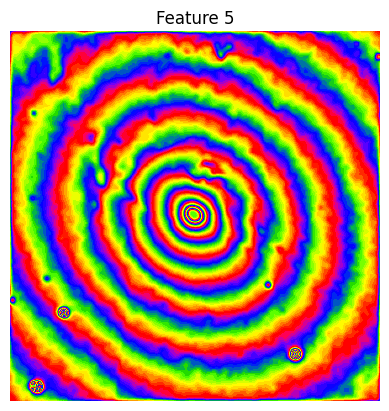

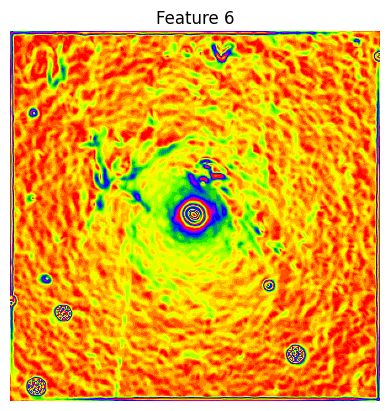

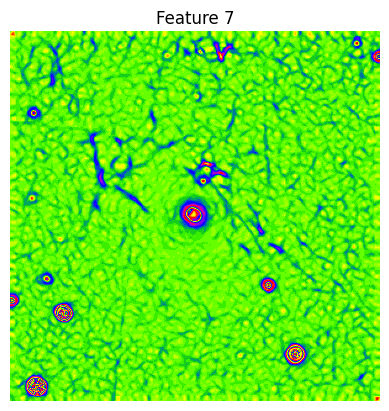

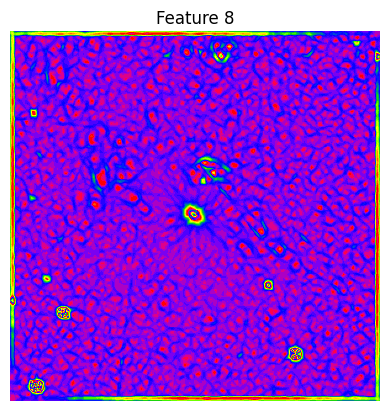

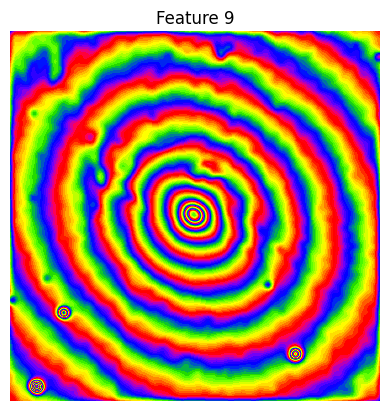

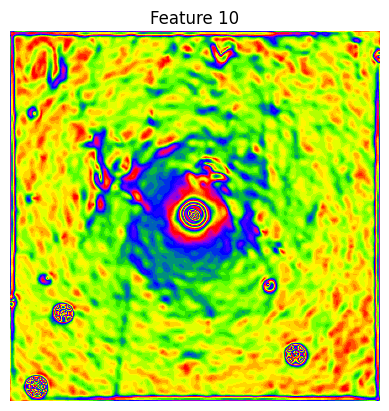

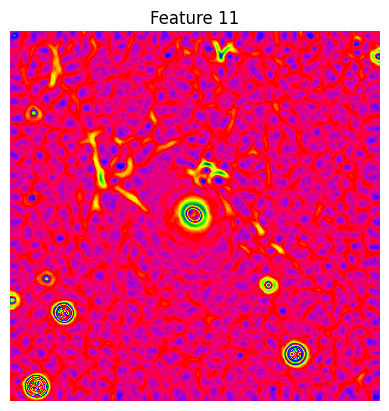

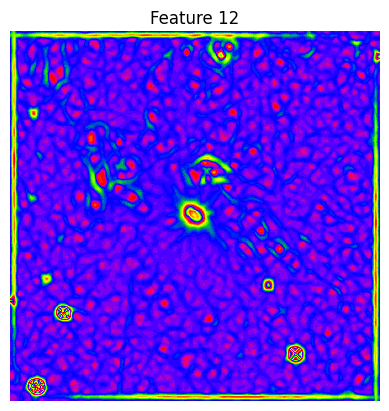

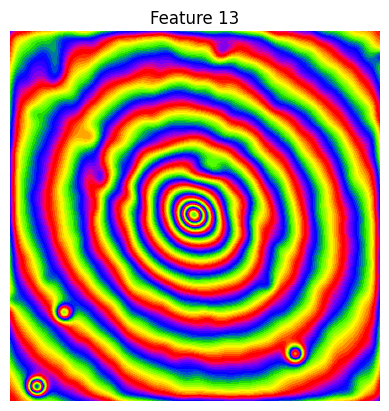

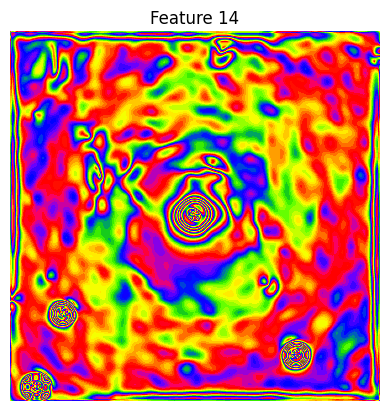

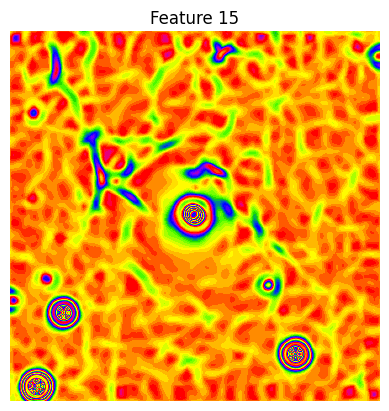

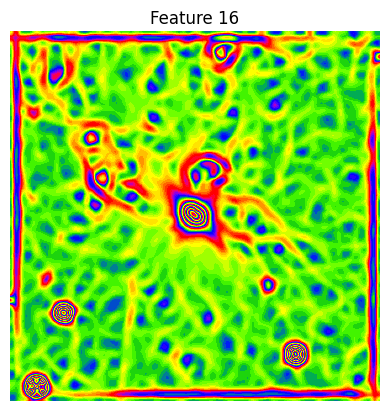

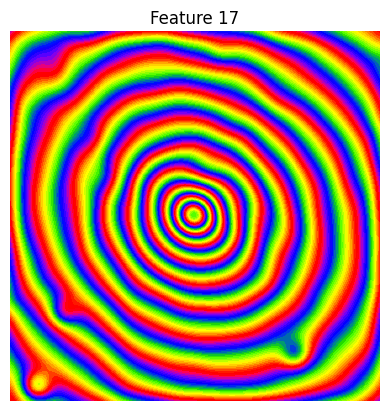

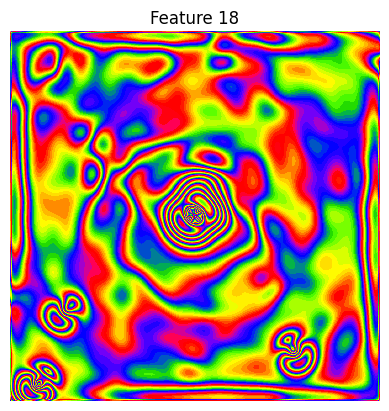

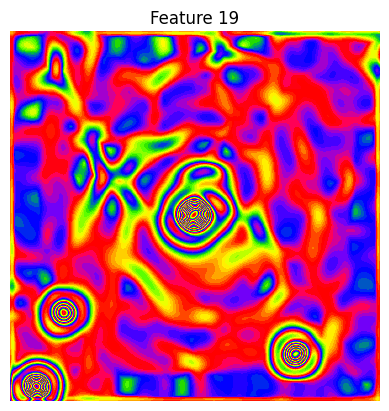

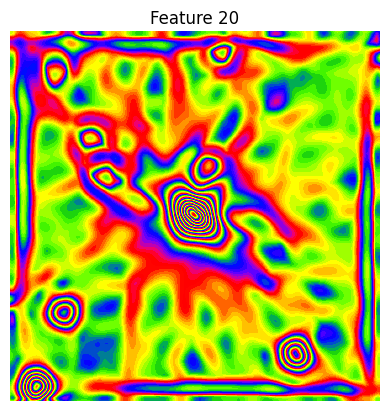

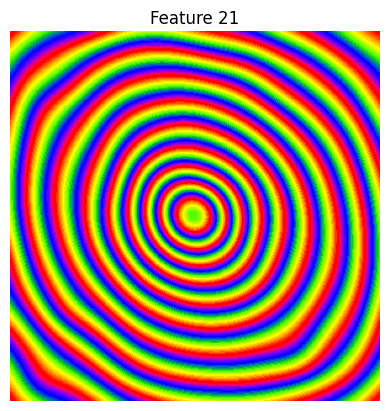

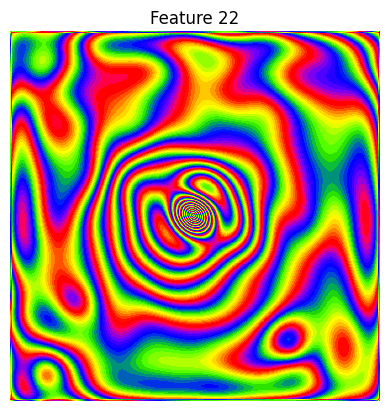

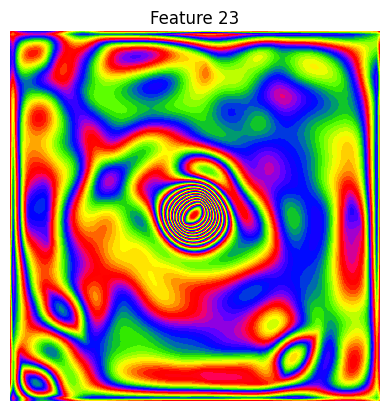

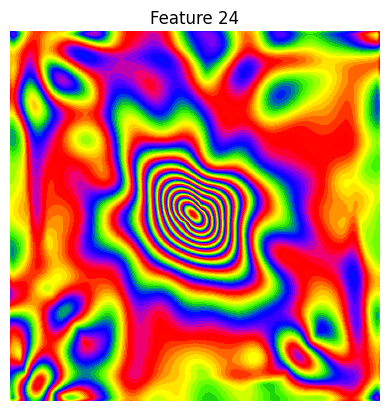

<Figure size 640x480 with 0 Axes>

In [97]:
#visualize each channel using prism spectral
for i, feature in enumerate(Pixels):
    plt.imshow(feature, cmap='prism', origin='lower')
    plt.title(f'Feature {i+1}')
    plt.axis('off')
    plt.show()
    plt.savefig(f'Feature_{i+1}.png')

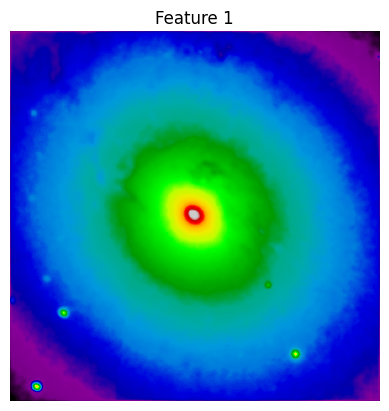

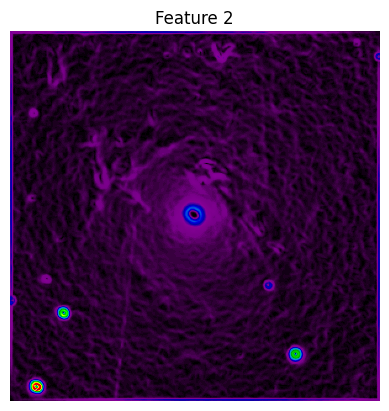

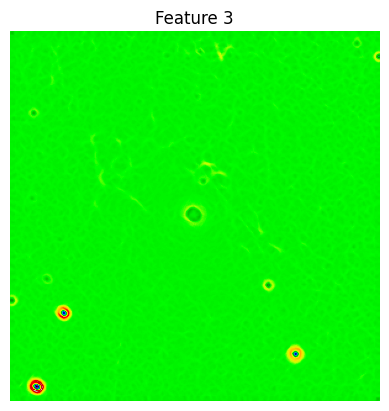

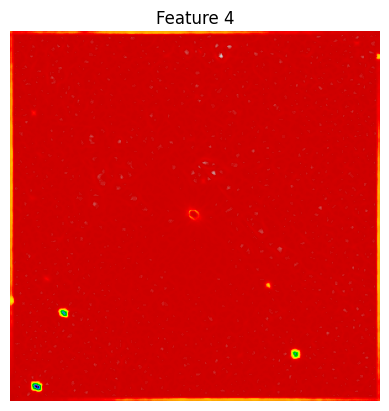

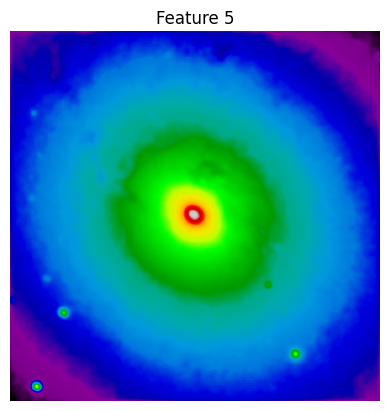

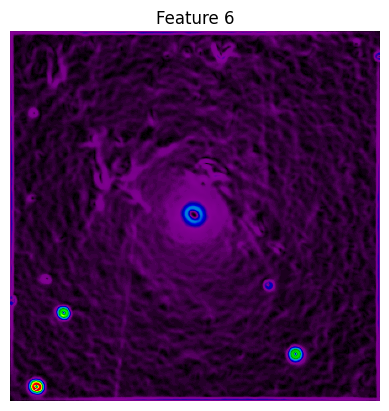

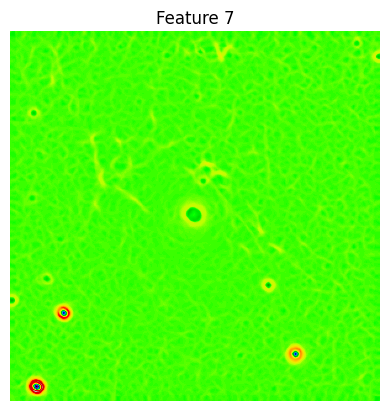

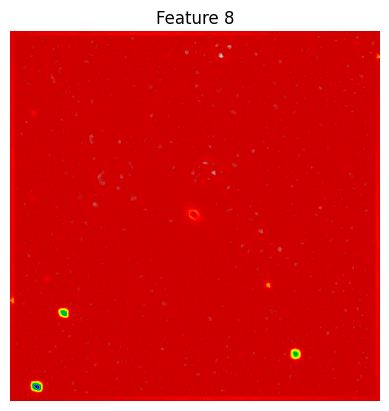

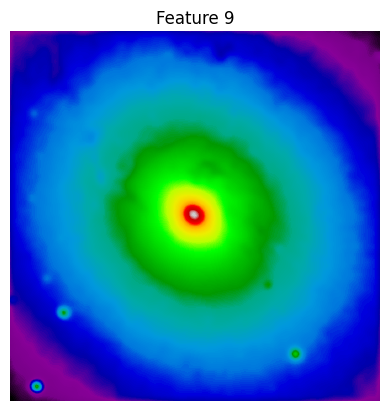

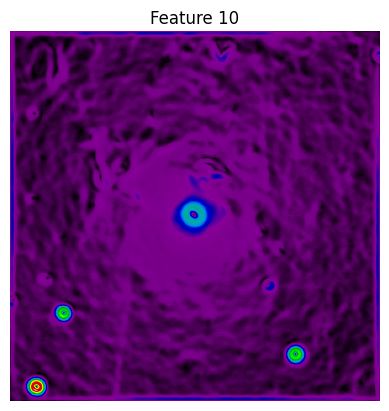

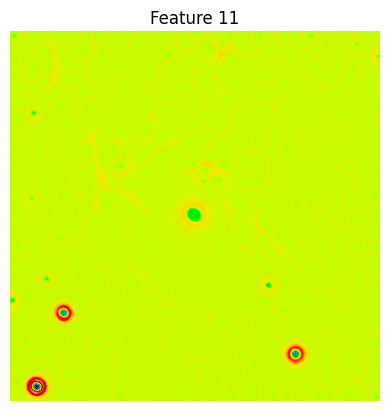

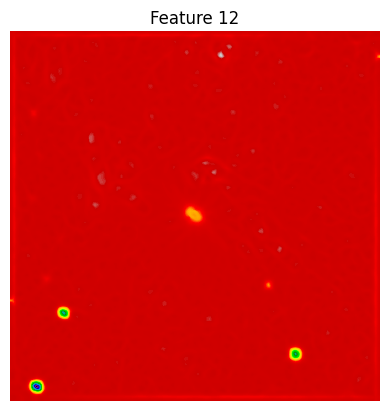

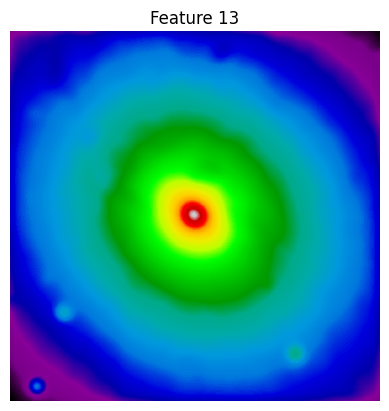

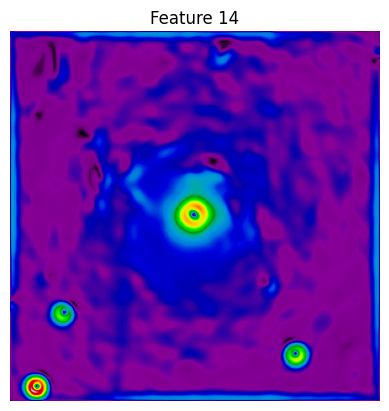

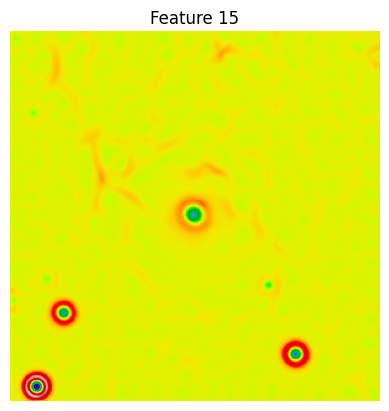

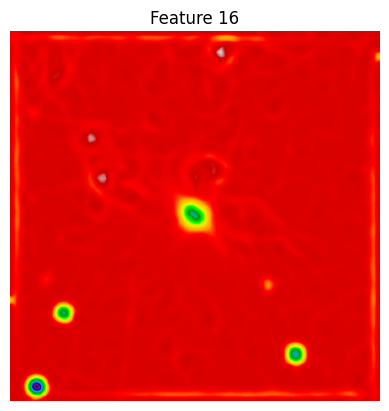

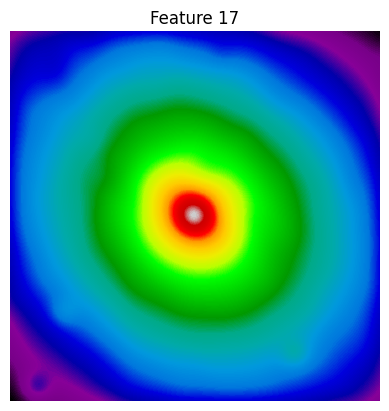

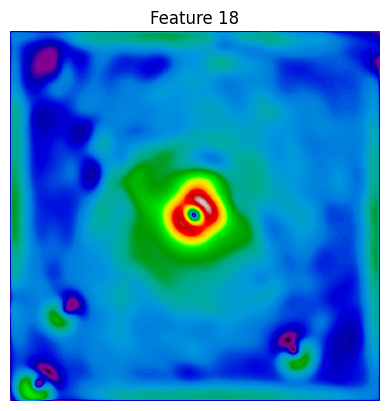

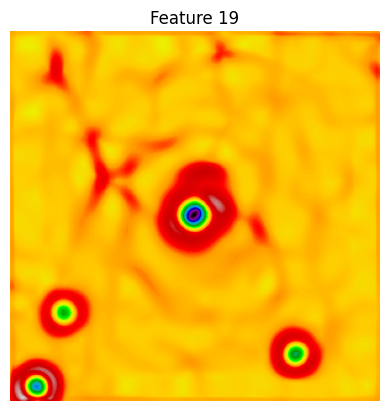

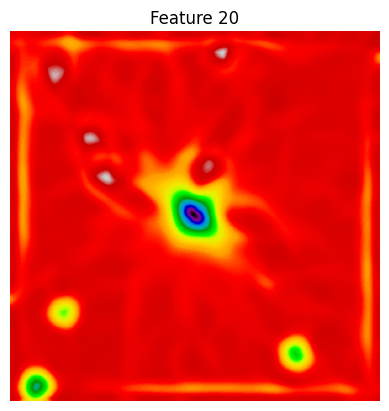

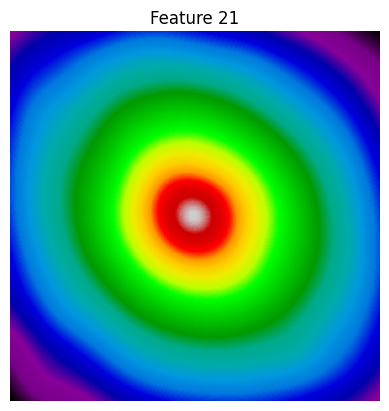

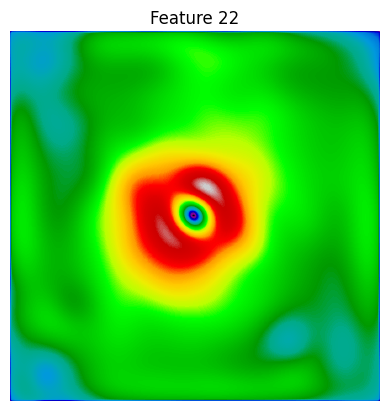

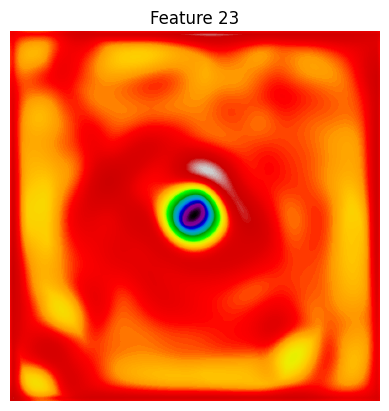

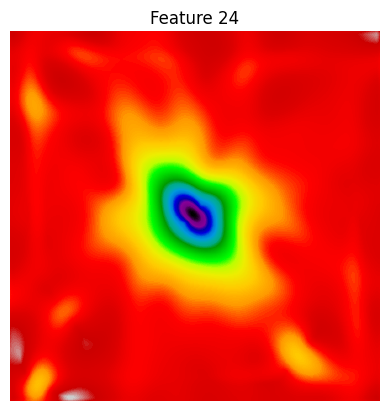

<Figure size 640x480 with 0 Axes>

In [98]:
for i, feature in enumerate(Pixels):
    plt.imshow(feature, cmap='nipy_spectral', origin='lower')
    plt.title(f'Feature {i+1}')
    plt.axis('off')
    plt.show()
    plt.savefig(f'nipy_spectral_Feature_{i+1}.png')